## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


首先，不設定跑一次結果。為了畫圖方便，只用兩個特徵

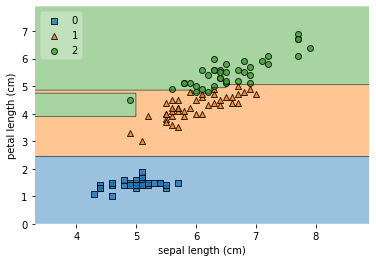

Acuuracy:  0.9473684210526315


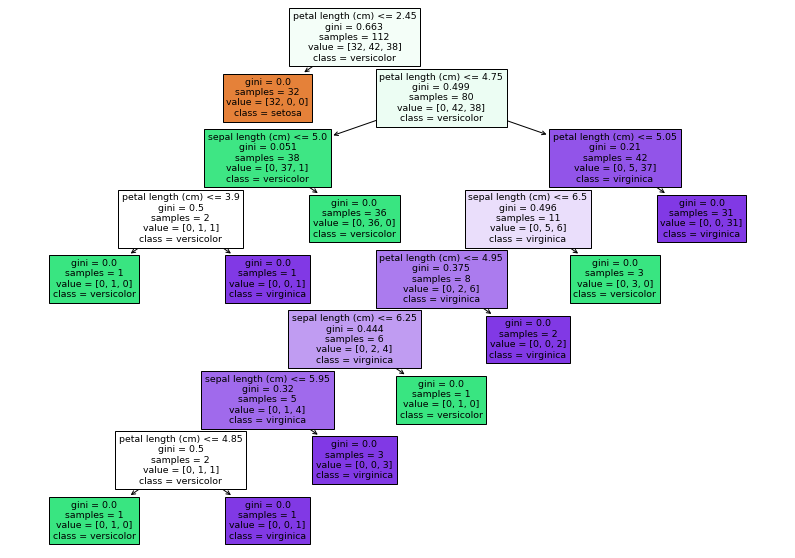

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()
fn = np.array(iris.feature_names)
cn = np.array(iris.target_names)
x_train, x_test, y_train, y_test = train_test_split(iris.data[:,[0,2]], iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plot_decision_regions(x_train, y_train,clf=clf,legend=2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()
# 將樹視覺化
plt.figure(figsize=(14,10))
tree.plot_tree(clf,feature_names = fn[[0,2]],  class_names=cn,filled = True);
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

將  min_samples_split 設為 80 ，變成一個簡單的樹，結果反而變好了

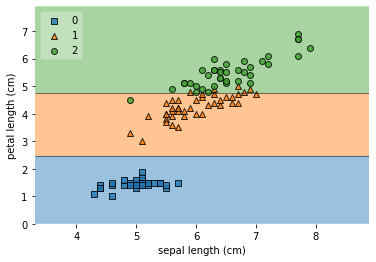

Acuuracy:  0.9736842105263158


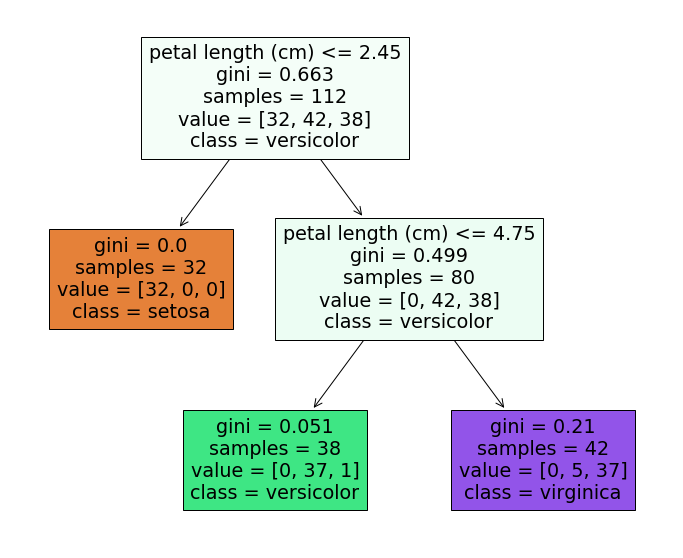

In [3]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()
fn = np.array(iris.feature_names)
cn = np.array(iris.target_names)
x_train, x_test, y_train, y_test = train_test_split(iris.data[:,[0,2]], iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier(min_samples_split=80)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plot_decision_regions(x_train, y_train,clf=clf,legend=2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()
# 將樹視覺化
plt.figure(figsize=(12,10))
tree.plot_tree(clf,feature_names = fn[[0,2]],  class_names=cn,filled = True);
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
iris=None

同樣用 wine 做一次

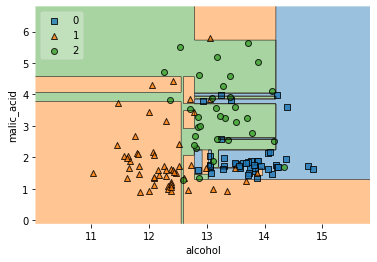

Acuuracy:  0.7555555555555555


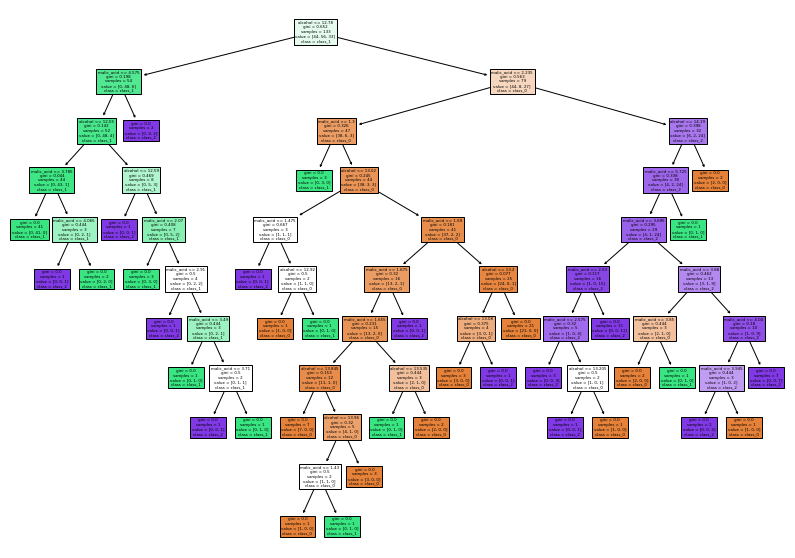

In [4]:
wine = datasets.load_wine()
fn = np.array(wine.feature_names)
cn = np.array(wine.target_names)
x_train, x_test, y_train, y_test = train_test_split(wine.data[:,[0,1]], wine.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plot_decision_regions(x_train, y_train,clf=clf,legend=2)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()
# 將樹視覺化
plt.figure(figsize=(14,10))
tree.plot_tree(clf,feature_names = fn[[0,1]],  class_names=cn,filled = True);
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

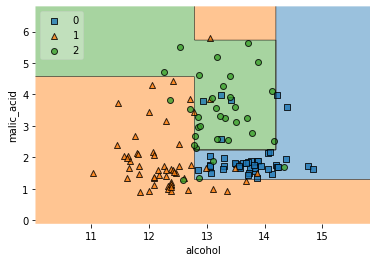

Acuuracy:  0.8222222222222222


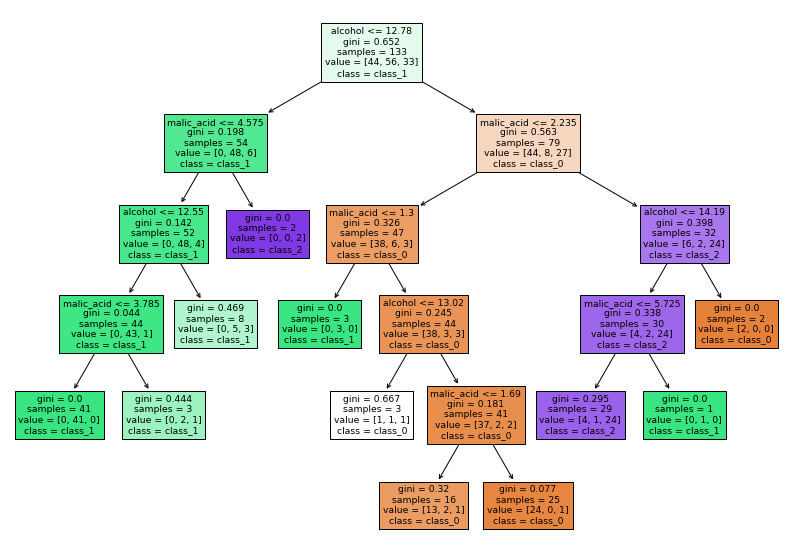

In [5]:
wine = datasets.load_wine()
fn = np.array(wine.feature_names)
cn = np.array(wine.target_names)
x_train, x_test, y_train, y_test = train_test_split(wine.data[:,[0,1]], wine.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier(min_samples_split=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plot_decision_regions(x_train, y_train,clf=clf,legend=2)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()
# 將樹視覺化
plt.figure(figsize=(14,10))
tree.plot_tree(clf,feature_names = fn[[0,1]],  class_names=cn,filled = True);
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

 和 logistic regression 比較一下，如果調整的好可以超過  logistic regression 的表現

In [6]:
from sklearn.linear_model import LogisticRegression

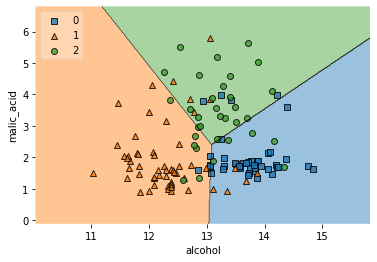

Acuuracy:  0.8


In [7]:
wine = datasets.load_wine()
fn = np.array(wine.feature_names)
cn = np.array(wine.target_names)
x_train, x_test, y_train, y_test = train_test_split(wine.data[:,[0,1]], wine.target, test_size=0.25, random_state=4)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plot_decision_regions(x_train, y_train,clf=clf,legend=2)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)